In [190]:
import pandas as pd
dataset = pd.read_csv('Machine_Failure_Prediction.csv')
dataset.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine Failure,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [191]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10007 entries, 0 to 10006
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10007 non-null  int64  
 1   Product ID               10007 non-null  object 
 2   Type                     10007 non-null  object 
 3   Air temperature [K]      10007 non-null  float64
 4   Process temperature [K]  10007 non-null  float64
 5   Rotational speed [rpm]   10007 non-null  int64  
 6   Torque [Nm]              10007 non-null  float64
 7   Tool wear [min]          10007 non-null  int64  
 8   Machine Failure          10007 non-null  int64  
 9   Failure Type             10007 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.9+ KB


In [192]:
dataset.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine Failure
count,10007.000000,10007.000000,10007.000000,10007.000000,10007.000000,10007.000000,10007.000000
mean,5004.000000,300.004107,310.004507,1538.833217,39.981613,107.940442,0.033876
std,2888.916406,1.999801,1.483752,179.263232,9.968781,63.689753,0.180920
min,1.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2502.500000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5004.000000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7505.500000,301.500000,311.100000,1612.000000,46.700000,162.000000,0.000000
max,10007.000000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [193]:
dataset.shape

(10007, 10)

In [195]:
duplicate = dataset[dataset.duplicated('Product ID')]
duplicate

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine Failure,Failure Type
10000,10001,L57174,L,298.8,308.3,1634,27.9,12,0,No Failure
10001,10002,M24846,M,298.8,308.6,1507,42.3,207,0,No Failure
10002,10003,M24847,M,298.8,308.6,1500,37.1,210,0,No Failure
10003,10004,L57168,L,298.9,308.6,1771,24.1,213,0,No Failure
10004,10005,M24849,M,298.8,308.5,1577,33.2,0,0,No Failure
10005,10006,L57170,L,298.8,308.5,1527,36.2,3,0,No Failure
10006,10007,M24851,M,298.9,308.4,1827,26.1,5,0,No Failure


In [196]:
duplicate = list(dataset[dataset.duplicated('Product ID')].iloc[:,0])
dup=[]
for i in duplicate:
    dup.append(list(dataset['UDI']).index(i))
dataset.drop(index=dup,axis=0,inplace=True)

In [197]:
dataset.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine Failure            0
Failure Type               0
dtype: int64

In [198]:
dataset.iloc[:,2]=dataset['Type'].str.upper()

In [199]:
dataset=pd.get_dummies(data=dataset,columns=['Type'])

In [200]:
dataset.head()

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine Failure,Failure Type,Type_H,Type_L,Type_M
0,1,M14860,298.1,308.6,1551,42.8,0,0,No Failure,0,0,1
1,2,L47181,298.2,308.7,1408,46.3,3,0,No Failure,0,1,0
2,3,L47182,298.1,308.5,1498,49.4,5,0,No Failure,0,1,0
3,4,L47183,298.2,308.6,1433,39.5,7,0,No Failure,0,1,0
4,5,L47184,298.2,308.7,1408,40.0,9,0,No Failure,0,1,0


In [201]:
dataset = dataset.drop(['Failure Type','Product ID'], axis=1)

In [202]:
df_majority = dataset[(dataset['Machine Failure']==0)]
df_minority = dataset[(dataset['Machine Failure']==1)]
df_majority.count()
df_minority.count()
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority,replace=True,n_samples= 9661,random_state=42) 
df_minority_upsampled.count()
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
df_upsampled.count()

UDI                        19322
Air temperature [K]        19322
Process temperature [K]    19322
Rotational speed [rpm]     19322
Torque [Nm]                19322
Tool wear [min]            19322
Machine Failure            19322
Type_H                     19322
Type_L                     19322
Type_M                     19322
dtype: int64

In [203]:
y=df_upsampled.iloc[:,6].values

In [204]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_upsampled.drop(['Machine Failure'], axis=1),y, test_size = 0.2,random_state=0)

In [205]:
from sklearn.feature_selection import chi2
f_p_values=chi2(x_train,y_train)
f_p_values
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=x_train.columns
p_values

UDI                        0.000000e+00
Air temperature [K]        6.712022e-04
Process temperature [K]    2.845312e-01
Rotational speed [rpm]     0.000000e+00
Torque [Nm]                0.000000e+00
Tool wear [min]            0.000000e+00
Type_H                     2.308192e-17
Type_L                     7.147514e-14
Type_M                     5.967620e-12
dtype: float64

In [206]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

UDI                        0.560505
Rotational speed [rpm]     0.403997
Torque [Nm]                0.391412
Tool wear [min]            0.185854
Air temperature [K]        0.089033
Process temperature [K]    0.052281
Type_M                     0.004522
Type_L                     0.002005
Type_H                     0.000884
dtype: float64

In [207]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(x_train, y_train)
x_train.columns[sel_five_cols.get_support()]

Index(['UDI', 'Air temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]'],
      dtype='object')

In [208]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from scipy.io import arff
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)

sel.get_support()

selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

print(selected_feat)

Index(['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], dtype='object')


In [209]:
df_upsampled.drop(['Process temperature [K]','Type_H','Type_L','Type_M','Air temperature [K]'],axis=1,inplace=True)
df_upsampled.head()


,UDI,Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine Failure
4024,4025,1351,60.3,207,1
6618,6619,1309,65.8,75,1
4048,4049,2691,12.1,31,1
2864,2865,1380,47.6,246,1
4596,4597,1361,47.6,106,1


In [210]:
x = df_upsampled.iloc[:,:-1].values
y = df_upsampled.iloc[:,-1].values

In [211]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state=0)

In [212]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [213]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state = 0)
lg.fit(x_train, y_train)


LogisticRegression(random_state=0)

In [214]:
y_pred = lg.predict(x_test)
print(list(y_pred==y_test).count('False'))

0


In [215]:
dataset.head()


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine Failure,Type_H,Type_L,Type_M
0,1,298.1,308.6,1551,42.8,0,0,0,0,1
1,2,298.2,308.7,1408,46.3,3,0,0,1,0
2,3,298.1,308.5,1498,49.4,5,0,0,1,0
3,4,298.2,308.6,1433,39.5,7,0,0,1,0
4,5,298.2,308.7,1408,40.0,9,0,0,1,0


In [216]:
y_pred = lg.predict(x_test)
print(list(y_pred==y_test).count('False'))

0


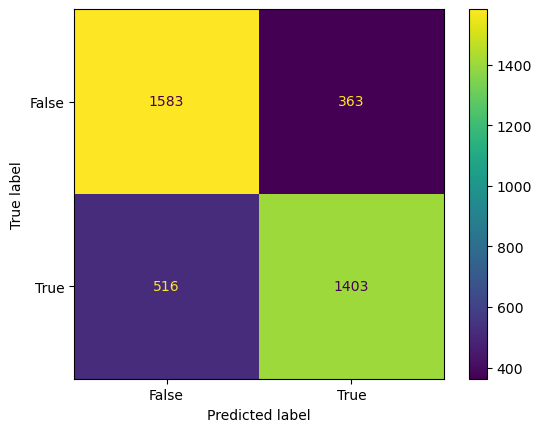

In [217]:
from sklearn import metrics
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(y_test, y_pred)
cm_disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
cm_disp.plot()
plt.show()

In [218]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Test accuracy for training set:',accuracy_score(y_test,y_pred))
print('Test precision for training set:',precision_score(y_test,y_pred))
print('Test recall for training set:',recall_score(y_test,y_pred))
print('Test f1 for training set:',f1_score(y_test,y_pred))

Test accuracy for training set: 0.7725743855109961
Test precision for training set: 0.7944507361268404
Test recall for training set: 0.7311099531005733
Test f1 for training set: 0.7614654002713704


In [219]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',random_state=0)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

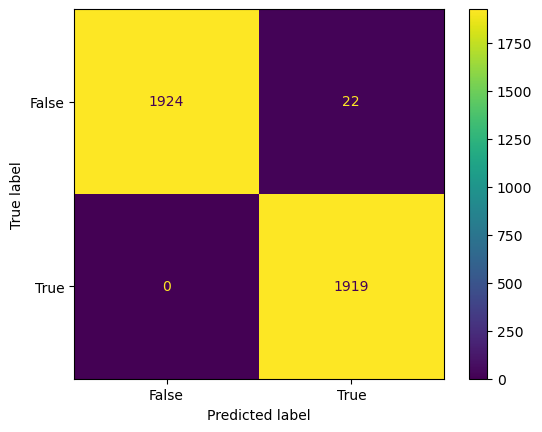

In [220]:
from sklearn import metrics
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(y_test, y_pred)
cm_disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
cm_disp.plot()
plt.show()

In [221]:
print('Test accuracy for trainingset:',accuracy_score(y_test,y_pred))
print('Test precision for training set:',precision_score(y_test,y_pred,average='weighted'))
print('Test recall for training set:',recall_score(y_test,y_pred,average='weighted'))
print('Test f1 for training set:',f1_score(y_test,y_pred,average='weighted'))

Test accuracy for trainingset: 0.9943078913324709
Test precision for training set: 0.9943724077624996
Test recall for training set: 0.9943078913324709
Test f1 for training set: 0.9943079332472902
